# Month 01 (Mini-project) Data Analysis

### Data Loading and Preprocessing

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('university_enrollment.csv')

df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


### Check for missing values

In [32]:
df.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

In [33]:
df.isnull().sum()/df.shape[0]*100

course_id            0.000000
course_type          0.000000
year                 0.000000
enrollment_count     0.000000
pre_score            0.000000
post_score          10.000000
pre_requirement     48.162162
department           0.000000
dtype: float64

### Handle missing values

In [72]:
df['pre_score'] = df['pre_score'].replace('-', pd.NA)
df['post_score'] = df['post_score'].replace('-', pd.NA)

In [70]:
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')
df['post_score'] = pd.to_numeric(df['post_score'], errors='coerce')
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


In [73]:
df['pre_score'].fillna(df['pre_score'].median(), inplace=True)
df['post_score'].fillna(df['post_score'].median(), inplace=True)
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


In [74]:
df['pre_requirement'].fillna('None', inplace=True)
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


### Drop any remaining rows with missing values

In [75]:
df.dropna(inplace=True)
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


#### Convert categorical variables to appropriate data types

In [76]:
df['course_type'] = df['course_type'].astype('category')
df['pre_requirement'] = df['pre_requirement'].astype('category')
df['department'] = df['department'].astype('category')
df['pre_score'] = df['pre_score'].astype('category')
df['post_score'] = df['post_score'].astype('category')

### Display basic information about the dataframe

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1665 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   course_id         1665 non-null   int64   
 1   course_type       1665 non-null   category
 2   year              1665 non-null   int64   
 3   enrollment_count  1665 non-null   int64   
 4   pre_score         1665 non-null   category
 5   post_score        1665 non-null   category
 6   pre_requirement   1665 non-null   category
 7   department        1665 non-null   category
dtypes: category(5), int64(3)
memory usage: 108.3 KB


### Display basic statistics

In [78]:
df.describe(include='all')

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
count,1665.000000,1665,1665.000000,1665.000000,1665.0,1665.0,1665,1665
unique,NaN,2,NaN,NaN,1442.0,53.0,3,5
top,NaN,online,NaN,NaN,49.2,72.0,None,Technology
freq,NaN,1236,NaN,NaN,117.0,82.0,808,641
mean,923.599399,NaN,2016.435435,231.543544,NaN,NaN,NaN,NaN
std,534.631409,NaN,3.449787,36.888354,NaN,NaN,NaN,NaN
min,1.000000,NaN,2011.000000,155.000000,NaN,NaN,NaN,NaN
25%,459.000000,NaN,2013.000000,185.000000,NaN,NaN,NaN,NaN
50%,926.000000,NaN,2016.000000,251.000000,NaN,NaN,NaN,NaN
75%,1382.000000,NaN,2019.000000,261.000000,NaN,NaN,NaN,NaN


### Distribution 

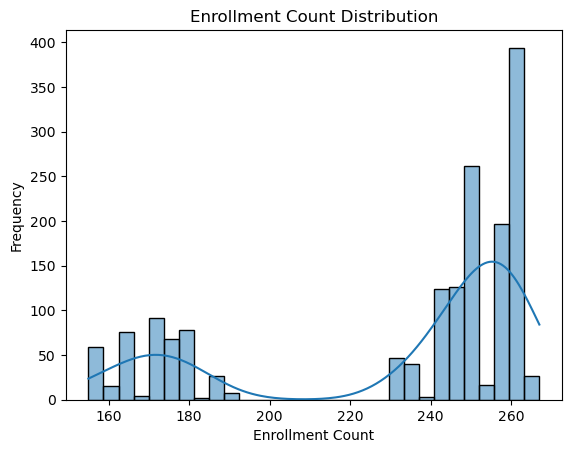

In [79]:
import warnings
warnings.filterwarnings("ignore")

sns.histplot(df['enrollment_count'], bins=30, kde=True)
plt.title('Enrollment Count Distribution')
plt.xlabel('Enrollment Count')
plt.ylabel('Frequency')
plt.show()

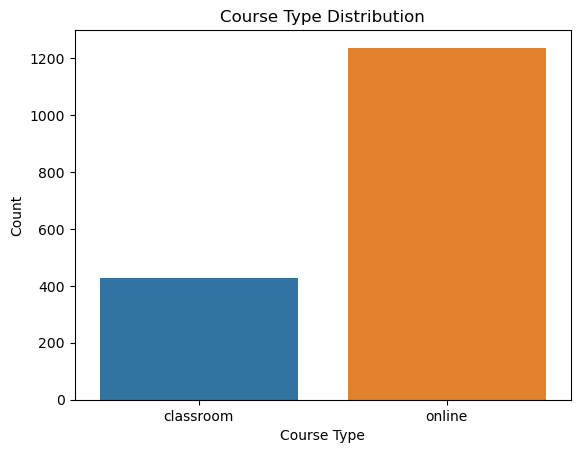

In [80]:
sns.countplot(data=df, x='course_type')
plt.title('Course Type Distribution')
plt.xlabel('Course Type')
plt.ylabel('Count')
plt.show()

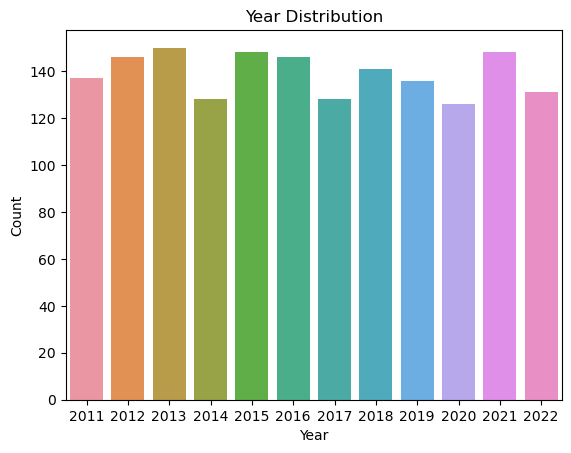

In [81]:
sns.countplot(data=df, x='year')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

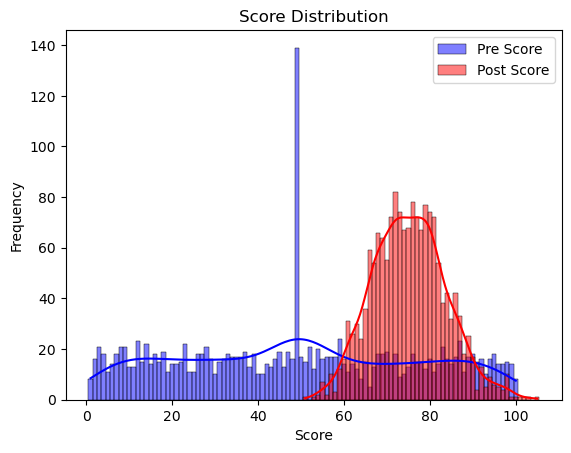

In [82]:
sns.histplot(df['pre_score'], bins=30, kde=True, color='blue', label='Pre Score')
sns.histplot(df['post_score'], bins=30, kde=True, color='red', label='Post Score')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

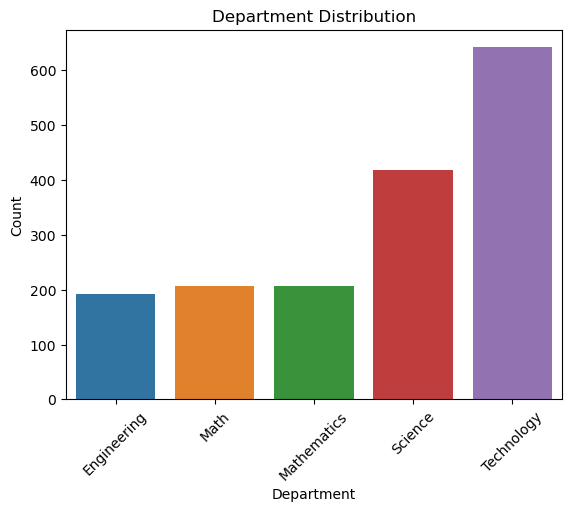

In [83]:
sns.countplot(data=df, x='department')
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Advanced Visualizations and Insights

#### Enrollment trends by course type

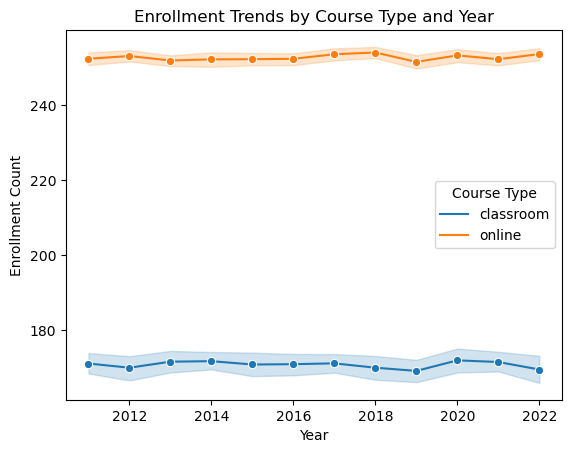

In [84]:
sns.lineplot(data=df, x='year', y='enrollment_count', hue='course_type', marker='o')
plt.title('Enrollment Trends by Course Type and Year')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.legend(title='Course Type')
plt.show()

### Enrollment trends by department and year

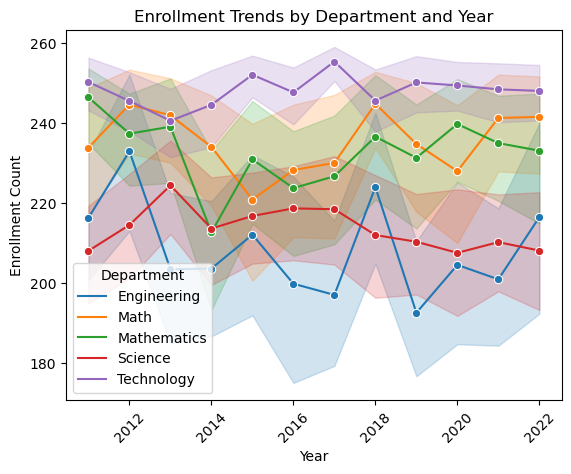

In [85]:
sns.lineplot(data=df, x='year', y='enrollment_count', hue='department', marker='o')
plt.title('Enrollment Trends by Department and Year')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.legend(title='Department')
plt.xticks(rotation=45)
plt.show()

### Box Plots for Score Distributions

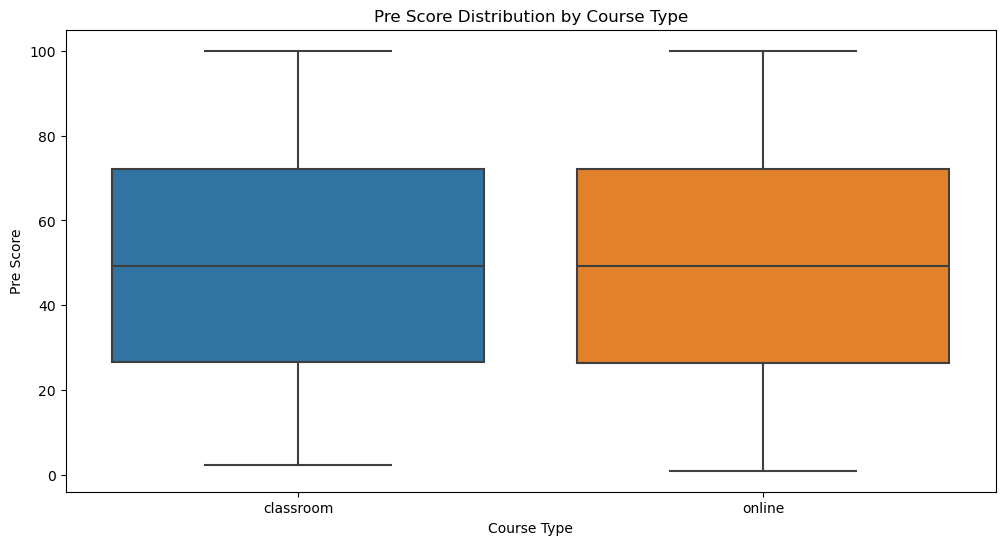

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='course_type', y='pre_score')
plt.title('Pre Score Distribution by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Pre Score')
plt.show()

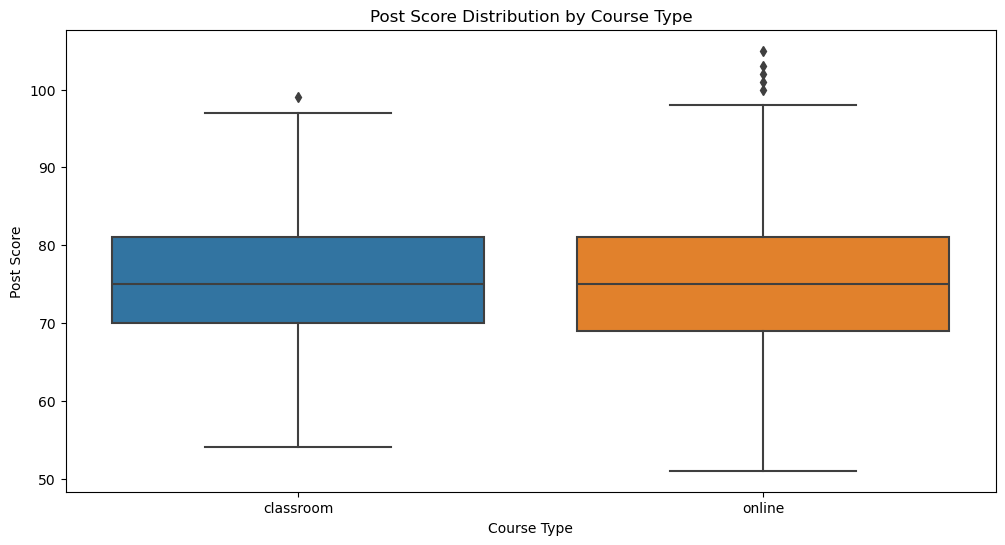

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='course_type', y='post_score')
plt.title('Post Score Distribution by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Post Score')
plt.show()

## Analyzing the Impact of Course Type on Enrollment

In [90]:
from scipy import stats

enrollment_means = df.groupby('course_type')['enrollment_count'].mean()
enrollment_means

course_type
classroom    170.724942
online       252.652913
Name: enrollment_count, dtype: float64

In [96]:
online_enrollments = df[df['course_type'] == 'online']['enrollment_count']
classroom_enrollments = df[df['course_type'] == 'classroom']['enrollment_count']
t_stat, p_val = stats.ttest_ind(online_enrollments, classroom_enrollments)

f"T-statistic: {t_stat}"
f"P-value: {p_val}"

if p_val < 0.05:
    print("The difference in enrollment counts between online and classroom courses is statistically significant.")
else:
    print("The difference in enrollment counts between online and classroom courses is not statistically significant.")

The difference in enrollment counts between online and classroom courses is statistically significant.


# Project 2 ==> IPL 2022 Analysis

In [97]:
import pandas as pd
9import plotly.express as px
import plotly.graph_objects as go

In [98]:
data = pd.read_csv ('ipl_2022.csv')

In [99]:
data

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [112]:
data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,NaN,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,NaN,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,NaN,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,NaN,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,NaN,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [113]:
data.tail()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,NaN,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,NaN,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,NaN,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,NaN,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22
73,74,"May 29,2022","Narendra Modi Stadium, Ahmedabad",Gujarat,Rajasthan,Final,Rajasthan,Bat,130,9,133,3,Gujarat,NaN,7,Hardik Pandya,Shubman Gill,45,Hardik Pandya,3--17


In [115]:
data.isnull().sum()

match_id                0
date                    0
venue                   0
team1                   0
team2                   0
stage                   0
toss_winner             0
toss_decision           0
first_ings_score        0
first_ings_wkts         0
second_ings_score       0
second_ings_wkts        0
match_winner            0
won_by                 74
margin                  0
player_of_the_match     0
top_scorer              0
highscore               0
best_bowling            0
best_bowling_figure     0
dtype: int64

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               0 non-null      object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [117]:
data.describe(include='all')

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
count,74.000000,74,74,74,74,74,74,74,74.000000,74.000000,74.000000,74.000000,74,0,74.000000,74,74,74.000000,74,74
unique,NaN,62,6,9,9,3,10,2,NaN,NaN,NaN,NaN,10,0,NaN,56,37,NaN,42,51
top,NaN,"May 1,2022","Wankhede Stadium, Mumbai",Banglore,Rajasthan,Group,Gujarat,Field,NaN,NaN,NaN,NaN,Gujarat,NaN,NaN,Kuldeep Yadav,Jos Buttler,NaN,Yuzvendra Chahal,3--22
freq,NaN,2,21,16,17,70,10,59,NaN,NaN,NaN,NaN,12,NaN,NaN,4,7,NaN,5,5
mean,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.121622,6.135135,158.540541,6.175676,NaN,NaN,16.972973,NaN,NaN,71.716216,NaN,NaN
std,21.505813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.048355,2.222699,29.299207,2.639832,NaN,NaN,19.651047,NaN,NaN,20.705052,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,0.000000,72.000000,1.000000,NaN,NaN,2.000000,NaN,NaN,28.000000,NaN,NaN
25%,19.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.250000,5.000000,142.750000,4.000000,NaN,NaN,5.250000,NaN,NaN,57.000000,NaN,NaN
50%,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.500000,6.000000,160.000000,6.000000,NaN,NaN,8.000000,NaN,NaN,68.000000,NaN,NaN
75%,55.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.750000,8.000000,176.000000,8.000000,NaN,NaN,18.000000,NaN,NaN,87.750000,NaN,NaN


### Number of matches won by each team

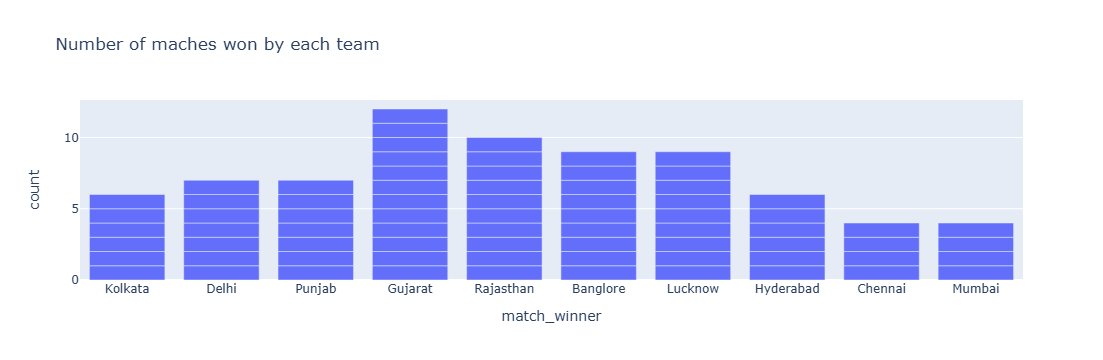

In [106]:
figure = px.bar(data, x = data['match_winner'], title = 'Number of maches won by each team')
figure.show()

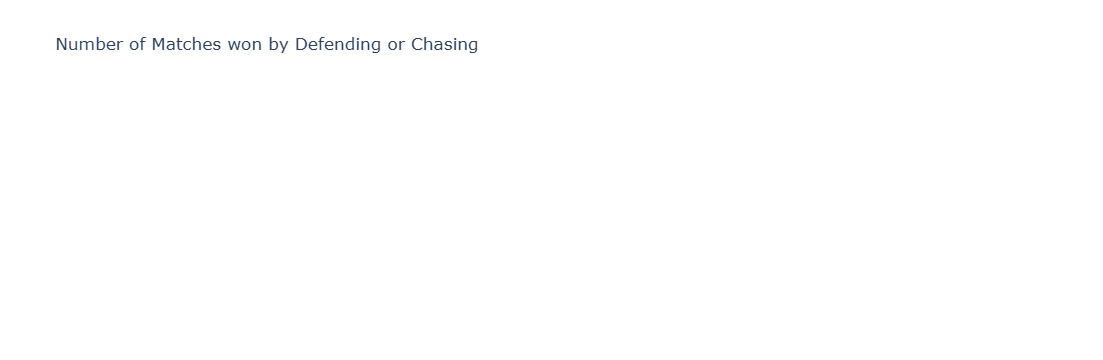

In [105]:
data['won_by'] = data['won_by'].map({'Wickets':'Chasing',
                                      'Run':'Defending'})
won_by = data["won_by"].value_counts()
label = won_by.index
counts = won_by.values

colors = ['red','lightgreen']

figure = go.Figure(data = [go.Pie(labels = label, values = counts)])
figure.update_layout (title_text = "Number of Matches won by Defending or Chasing")
figure.update_traces(hoverinfo = 'label+percent', 
                     textinfo = 'value', 
                     textfont_size = 30,
                     marker = dict(colors = colors, line = dict(color = 'black', width = 3)))
figure.show()

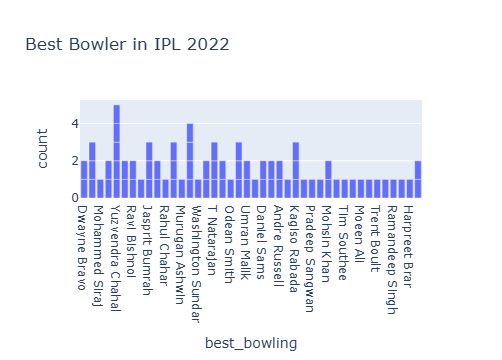

In [109]:
figure = px.bar(data, x = data['best_bowling'], title = "Best Bowler in IPL 2022")
figure.show()

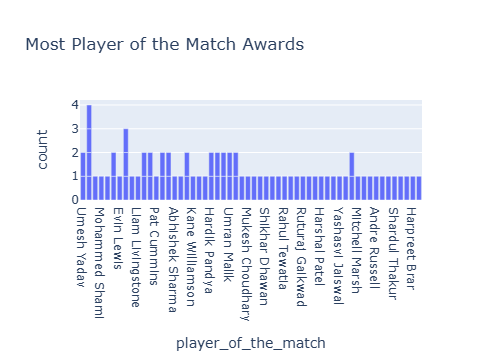

In [110]:
figure = px.bar(data, x = data['player_of_the_match'], title = 'Most Player of the Match Awards')
figure.show()

### Top Scorers in IPL 2022

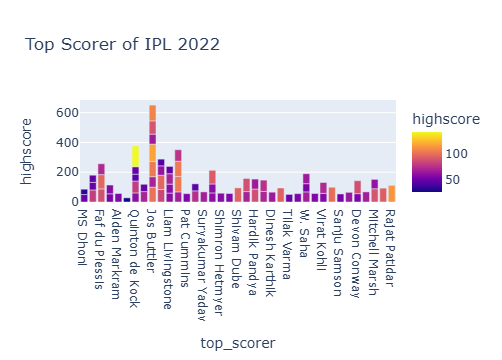

In [111]:
figure = px.bar(data, x = data['top_scorer'],
               y = data['highscore'],
               color = data['highscore'],
               title = "Top Scorer of IPL 2022")
figure.show()